In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Jorge Mejia\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/Kaggle/Students_Performance_in_Exams/'
path

'C:/Users/Jorge Mejia/Desktop/Kaggle/Students_Performance_in_Exams/'

In [3]:
df = pd.read_csv(path + 'StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Se arreglan los nombres de las columnas, para asi poder trabajar mas comodamente.
df.rename(columns={'parental level of education': 'parental_level_of_education', 'test preparation course': 'test_preparation_course', 'math score': 'math_score','reading score': 'reading_score', 'writing score':'writing_score'}, inplace=True)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Detalles de la tarea:

Averigüe si existe una correlación entre los diferentes atributos que se encuentran en el conjunto de datos.

Por ejemplo:

Género y puntaje de lectura

Raza y puntaje matemático

Almuerzo y puntuación de escritura


Sumisión esperada:

Un cuaderno con una representación visual que muestra si existe una correlación entre estos diferentes atributos.

Evaluación:

Una clara representación visual del análisis.

In [5]:
# Se crea una lista llamada gender_final, la cual es la que tendra
#los valores de la columna gender, dichos valores no estan repetidos
gender_complete = []
for x in df['gender']:
    gender_complete.append(x)

gender_final = list(set([y for y in gender_complete if gender_complete.count(y)>1]))
gender_final

['female', 'male']

In [6]:
# Se reemplazan los valores obtenidos de la lista gender_final por 0 y 1 con la finalidad de poder realizar la correlación.
data = df.replace({'male':0, 'female':1})
df = data
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44
4,0,group C,some college,standard,none,76,78,75


In [7]:
#Se crea una lista llamada race_final, la cual es la que tendra
#los valores de la columna race/ethnicity, dichos valores no estan repetidos
race_complete = []
for x in df['race/ethnicity']:
    race_complete.append(x)

race_final = list(set([y for y in race_complete if race_complete.count(y)>1]))
race_final

['group E', 'group B', 'group A', 'group C', 'group D']

In [8]:
# Se reemplazan los valores obtenidos de la lista race_final por 0, 1 ... 4 con la finalidad de poder realizar la correlación.
data = df.replace({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4})
df = data
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,1,bachelor's degree,standard,none,72,72,74
1,1,2,some college,standard,completed,69,90,88
2,1,1,master's degree,standard,none,90,95,93
3,0,0,associate's degree,free/reduced,none,47,57,44
4,0,2,some college,standard,none,76,78,75


In [9]:
parental_complete = []
for x in df['parental_level_of_education']:
    parental_complete.append(x)

parental_final = list(set([y for y in parental_complete if parental_complete.count(y)>1]))
parental_final

["associate's degree",
 'some high school',
 "bachelor's degree",
 'high school',
 'some college',
 "master's degree"]

In [10]:
# Se reemplazan los valores obtenidos de la lista parental_final por 0, 1 ... 5 con la finalidad de poder realizar la correlación.
data = df.replace({"master's degree": 0, "bachelor's degree": 1, 'some college':2,  'some high school':3, "associate's degree":4 , 'high school':5})
df = data
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,1,1,standard,none,72,72,74
1,1,2,2,standard,completed,69,90,88
2,1,1,0,standard,none,90,95,93
3,0,0,4,free/reduced,none,47,57,44
4,0,2,2,standard,none,76,78,75


In [11]:
lunch_complete = []
for x in df['lunch']:
    lunch_complete.append(x)

lunch_final = list(set([y for y in lunch_complete if lunch_complete.count(y)>1]))
lunch_final

['standard', 'free/reduced']

In [12]:
data = df.replace({'standard': 0, 'free/reduced': 1})
df = data
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,1,1,0,none,72,72,74
1,1,2,2,0,completed,69,90,88
2,1,1,0,0,none,90,95,93
3,0,0,4,1,none,47,57,44
4,0,2,2,0,none,76,78,75


In [13]:
preparation_complete = []
for x in df['test_preparation_course']:
    preparation_complete.append(x)

preparation_final = list(set([y for y in preparation_complete if preparation_complete.count(y)>1]))
preparation_final

['completed', 'none']

In [14]:
data = df.replace({'none': 0, 'completed': 1})
df = data
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,1,1,0,0,72,72,74
1,1,2,2,0,1,69,90,88
2,1,1,0,0,0,90,95,93
3,0,0,4,1,0,47,57,44
4,0,2,2,0,0,76,78,75


Una vez se tiene el dataset bien estructurado, se procede a realizar las correlaciones.

In [15]:
# Correlacion de todas las variables
df.corr()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
gender,1.000000,0.001502,-0.046927,0.021372,-0.006028,-0.167982,0.244313,0.301225
race/ethnicity,0.001502,1.000000,-0.065737,-0.046563,0.017508,0.216415,0.145253,0.165691
parental_level_of_education,-0.046927,-0.065737,1.000000,-0.018350,-0.036351,-0.124117,-0.157142,-0.201413
lunch,0.021372,-0.046563,-0.018350,1.000000,0.017044,-0.350877,-0.229560,-0.245769
test_preparation_course,-0.006028,0.017508,-0.036351,0.017044,1.000000,0.177702,0.241780,0.312946
math_score,-0.167982,0.216415,-0.124117,-0.350877,0.177702,1.000000,0.817580,0.802642
reading_score,0.244313,0.145253,-0.157142,-0.229560,0.241780,0.817580,1.000000,0.954598
writing_score,0.301225,0.165691,-0.201413,-0.245769,0.312946,0.802642,0.954598,1.000000


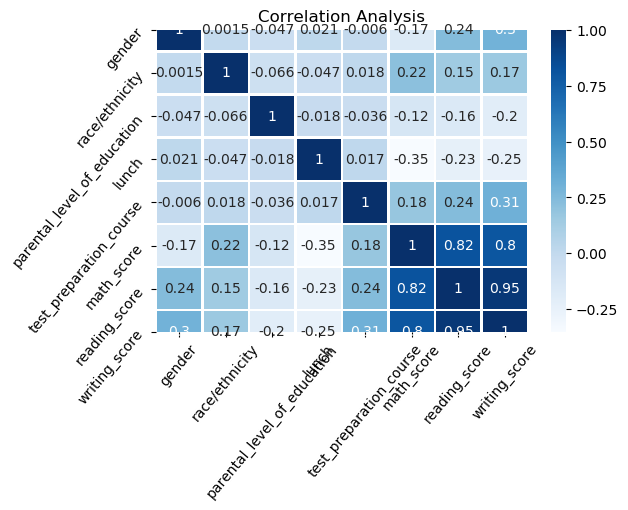

In [16]:
# Mapa de calor de la correlación
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(),annot=True,lw=1,linecolor='white',cmap='Blues')
plt.xticks(rotation=50)
plt.yticks(rotation = 50)
plt.show()

In [17]:
# Correlacion entre Genero(gender) y  Puntaje de lectura(reading_score)
df[['gender', 'reading_score']].corr()

,gender,reading_score
gender,1.000000,0.244313
reading_score,0.244313,1.000000


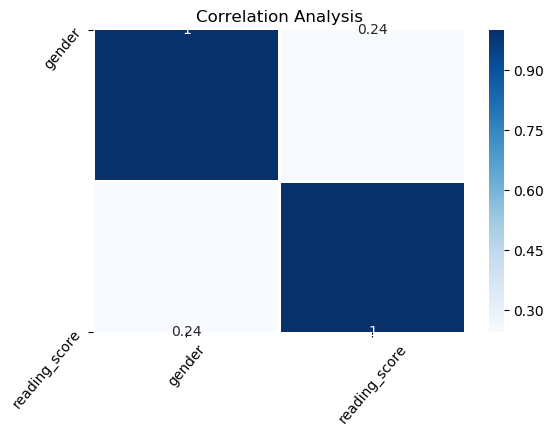

In [18]:
# Mapa de calor de la correlacion
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df[['gender', 'reading_score']].corr(),annot=True,lw=1,linecolor='white',cmap='Blues')
plt.xticks(rotation=50)
plt.yticks(rotation = 50)
plt.show()

In [19]:
# Correlacion entre Etnia(race/ethnicity) y  Puntaje de matematicas (math_score)
df[['race/ethnicity', 'math_score']].corr()

,race/ethnicity,math_score
race/ethnicity,1.000000,0.216415
math_score,0.216415,1.000000


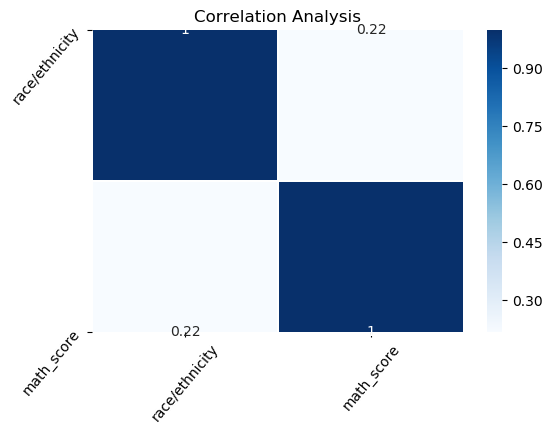

In [20]:
# Mapa de calor de la correlacion
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df[['race/ethnicity', 'math_score']].corr(),annot=True,lw=1,linecolor='white',cmap='Blues')
plt.xticks(rotation=50)
plt.yticks(rotation = 50)
plt.show()

In [21]:
# Correlacion entre Lunch(Lunch) y  Puntaje de escritura (writing_score)
df[['lunch', 'writing_score']].corr()

,lunch,writing_score
lunch,1.000000,-0.245769
writing_score,-0.245769,1.000000


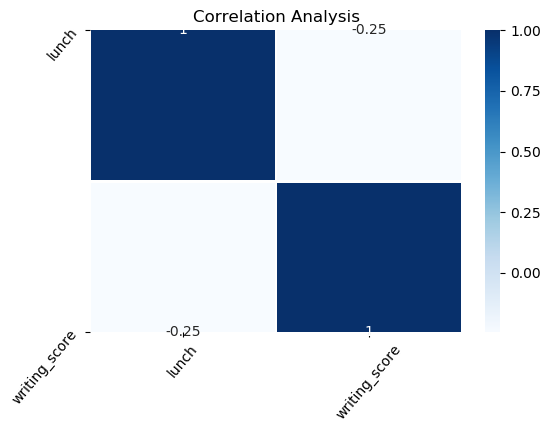

In [22]:
# Mapa de calor de la correlacion
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df[['lunch', 'writing_score']].corr(),annot=True,lw=1,linecolor='white',cmap='Blues')
plt.xticks(rotation=50)
plt.yticks(rotation = 50)
plt.show()

Una vez se realizaron las correlaciones que se piden en la tarea, se procede a realizar las correlaciones individuales de las
variables que mas correlacion obtuvieron en el mapa de calor con todas las variables.

In [23]:
# Correlacion entre Puntahe de matematicas(math_score) y  Puntaje de lectura (reading_score)
df[['math_score', 'reading_score']].corr()

,math_score,reading_score
math_score,1.00000,0.81758
reading_score,0.81758,1.00000


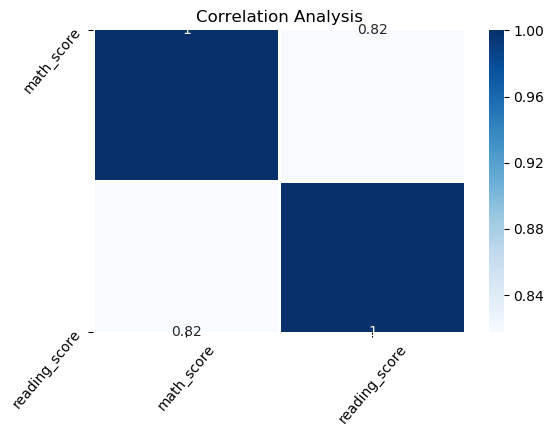

In [24]:
# Mapa de calor de la correlacion
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df[['math_score', 'reading_score']].corr(),annot=True,lw=1,linecolor='white',cmap='Blues')
plt.xticks(rotation=50)
plt.yticks(rotation = 50)
plt.show()

In [25]:
# Correlacion entre Puntaje de lectura (reading_score) y  Puntaje de escritura (writing_score)
df[['reading_score', 'writing_score']].corr()

,reading_score,writing_score
reading_score,1.000000,0.954598
writing_score,0.954598,1.000000


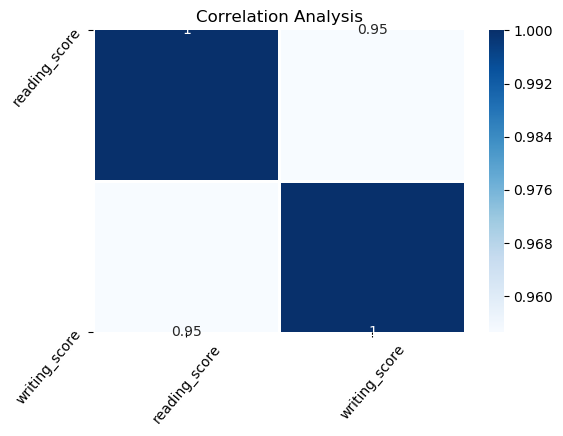

In [26]:
# Mapa de calor de la correlacion
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df[['reading_score', 'writing_score']].corr(),annot=True,lw=1,linecolor='white',cmap='Blues')
plt.xticks(rotation=50)
plt.yticks(rotation = 50)
plt.show()

In [27]:
# Correlacion entre Puntaje de matematicas (math_score) y  Puntaje de escritura (writing_score)
df[['math_score', 'writing_score']].corr()

,math_score,writing_score
math_score,1.000000,0.802642
writing_score,0.802642,1.000000


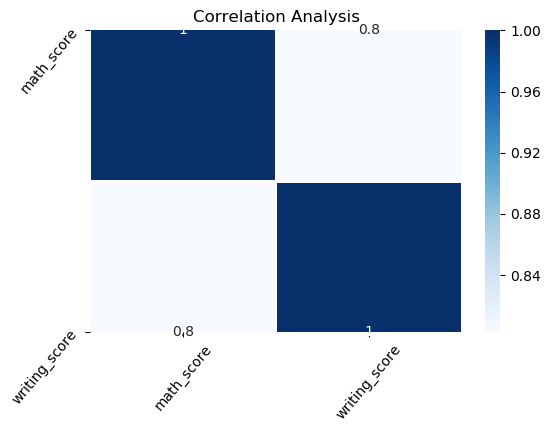

In [28]:
# Mapa de calor de la correlacion
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df[['math_score', 'writing_score']].corr(),annot=True,lw=1,linecolor='white',cmap='Blues')
plt.xticks(rotation=50)
plt.yticks(rotation = 50)
plt.show()

Como dato adicional se haran graficas de los datos con los que contaba el dataset.

In [29]:
path = 'C:/Users/Jorge Mejia/Desktop/Kaggle/Students_Performance_in_Exams/'
df = pd.read_csv(path + 'StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


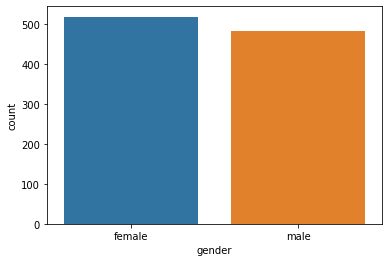

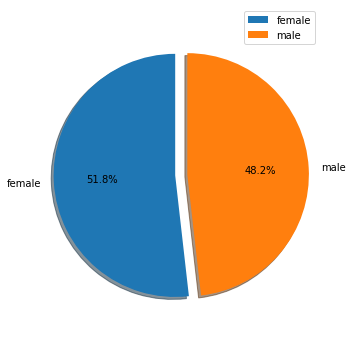

In [30]:
# Grafica de la columna genero
sns.countplot(df['gender'])

explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(df['gender'].value_counts(),explode=explode, labels=gender_final, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

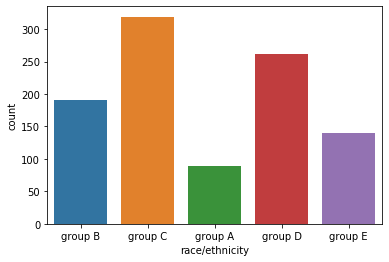

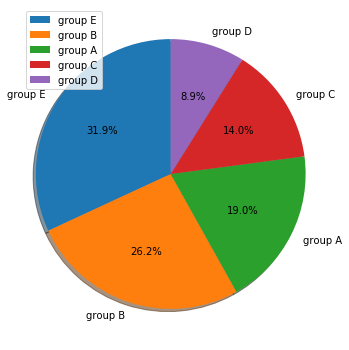

In [31]:
# Grafica de la columna Etnia
sns.countplot(df['race/ethnicity'])

explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(df['race/ethnicity'].value_counts(),explode= None, labels= race_final, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

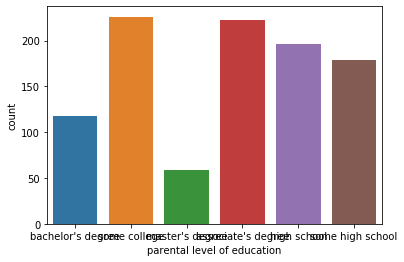

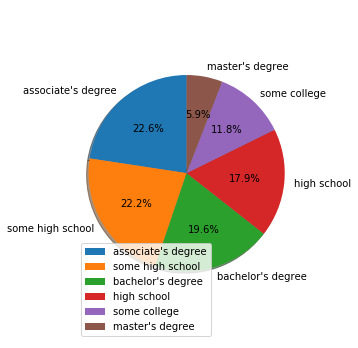

In [32]:
# Grafica de la columna nivel de educacion de los padres
sns.countplot(df['parental level of education'])

explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(df['parental level of education'].value_counts(),explode=None, labels=parental_final, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

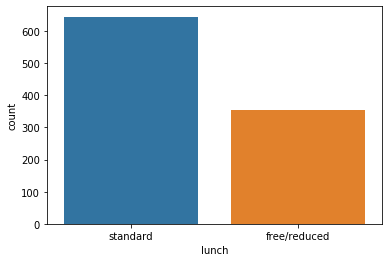

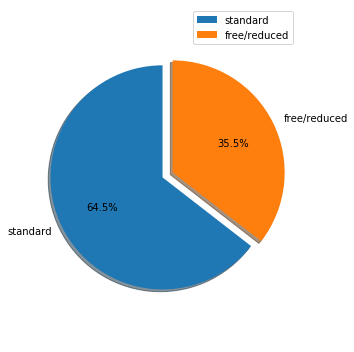

In [33]:
# Grafica de la columna lunch
sns.countplot(df['lunch'])

explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(df['lunch'].value_counts(),explode=explode, labels= lunch_final, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

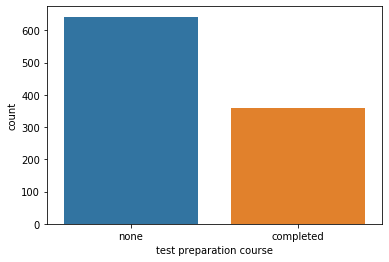

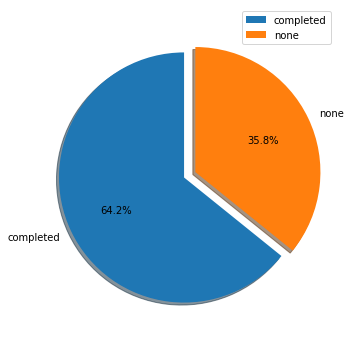

In [34]:
# Grafica de la columna curso de preparación de examen
sns.countplot(df['test preparation course'])

explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(df['test preparation course'].value_counts(),explode=explode, labels= preparation_final, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

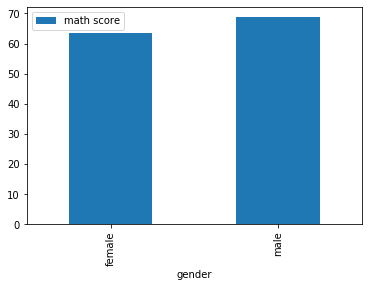

In [35]:
# Grafica de el porcentaje de notas en matematicas por genero
df.groupby('gender')['math score'].mean().plot(kind='bar', legend='Reverse')

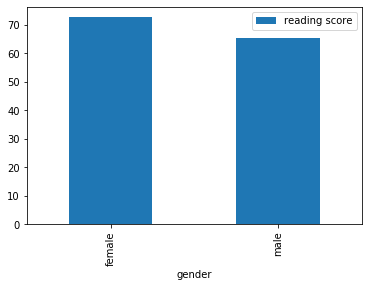

In [36]:
# Grafica de el porcentaje de notas en Lectura por genero
df.groupby('gender')['reading score'].mean().plot(kind='bar', legend='Reverse')

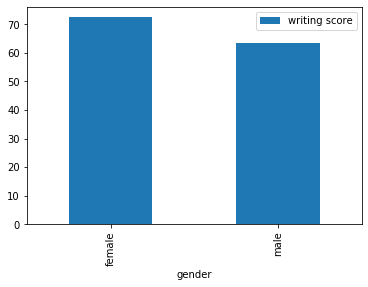

In [37]:
# Grafica de el porcentaje de notas en Escritura por genero
df.groupby('gender')['writing score'].mean().plot(kind='bar', legend='Reverse')